In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
titanic = pd.read_csv('titanic_train.csv', sep=";")
titanic


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,712.833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30,C148,C


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    object 
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 83.7+ KB


In [6]:
#Kolom Age
#mengisi data null pada kolom Age dengan rata-rata usia

rata_umur = titanic['Age'].mean()
titanic['Age'] = titanic['Age'].fillna(rata_umur)

#memeriksa apakah masih ada yang null pada kolom Age
titanic['Age'].isna().sum()

0

In [7]:
#Kolom Embarked
#mengisi data null pada kolom Embarked dengan nilai yang paling banyak muncul (modus)

modus = titanic['Embarked'].mode()[0]
titanic['Embarked'] = titanic['Embarked'].fillna(modus)

#memeriksa apakah masih ada yang null pada kolom embarked
titanic['Embarked'].isna().sum()

0

In [8]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    object 
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 83.7+ KB


In [9]:
#Menghapus kolom Cabin

titanic.drop('Cabin', axis=1, inplace=True)
#axis = 1 menandakan kolom, axis = 0 menandakan baris

In [10]:
#membuang kolom Ticket
titanic.drop('Ticket', axis=1, inplace=True)

In [11]:
#menghapus kolom yang tidak digunakan
titanic.drop('Name', axis=1, inplace=True)

In [12]:
#mengkonver data kolom Sex, male = 0; female = 1
titanic['Sex'] = titanic['Sex'].replace(['male', 'female'], [0, 1])
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.25,S
1,2,1,1,1,38.0,1,0,712.833,C
2,3,1,3,1,26.0,0,0,7.925,S
3,4,1,1,1,35.0,1,0,53.1,S
4,5,0,3,0,35.0,0,0,8.05,S


In [13]:
#mengkonver data kolom Embarked, S = 1, C = 2, Q = 3

titanic['Embarked'] = titanic['Embarked'].replace(['S', 'C', 'Q'], [1, 2, 3])

In [14]:
titanic['Fare'] = titanic['Fare'].str.replace(".","")

C:\Users\ferro\AppData\Local\Temp/ipykernel_10224/279635179.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  titanic['Fare'] = titanic['Fare'].str.replace(".","")


In [15]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,725,1
1,2,1,1,1,38.0,1,0,712833,2
2,3,1,3,1,26.0,0,0,7925,1
3,4,1,1,1,35.0,1,0,531,1
4,5,0,3,0,35.0,0,0,805,1


<AxesSubplot:>

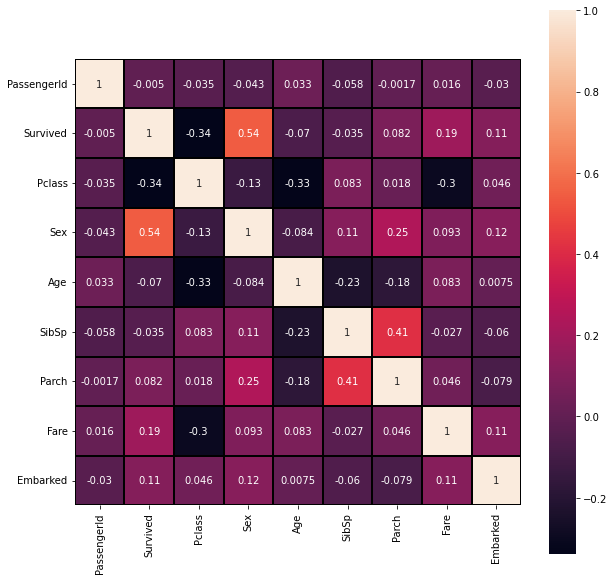

In [16]:
#untuk mencari tahu variabel / feature yang paling mempengaruhi target (Survived)

f, ax = plt.subplots(figsize=(10,10))

sns.heatmap(titanic.astype(float).corr(), linewidth=0.25, vmax=1.0, square=True, linecolor='black', annot=True)

In [17]:
#membagi data X dan Y (x = variabel independen; y = variabel dependen/target)

x = titanic[['Sex', 'Parch', 'Fare', 'Embarked']]

#x hanya menggunakan data yang memiliki korelasi tinggi dengan Survived
y = titanic['Survived']

In [18]:
#membagi data training dan testing

from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, random_state = 0)
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(668, 4)
(223, 4)
(668,)
(223,)


In [19]:
#Modeling dengan Decision Tree

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(train_x, train_y)

#mengevaluasi hasil prediksi
y_prediksi3 = dt.predict(test_x)
akurasi_dt = dt.score(test_x, test_y)
akurasi_dt

0.8026905829596412

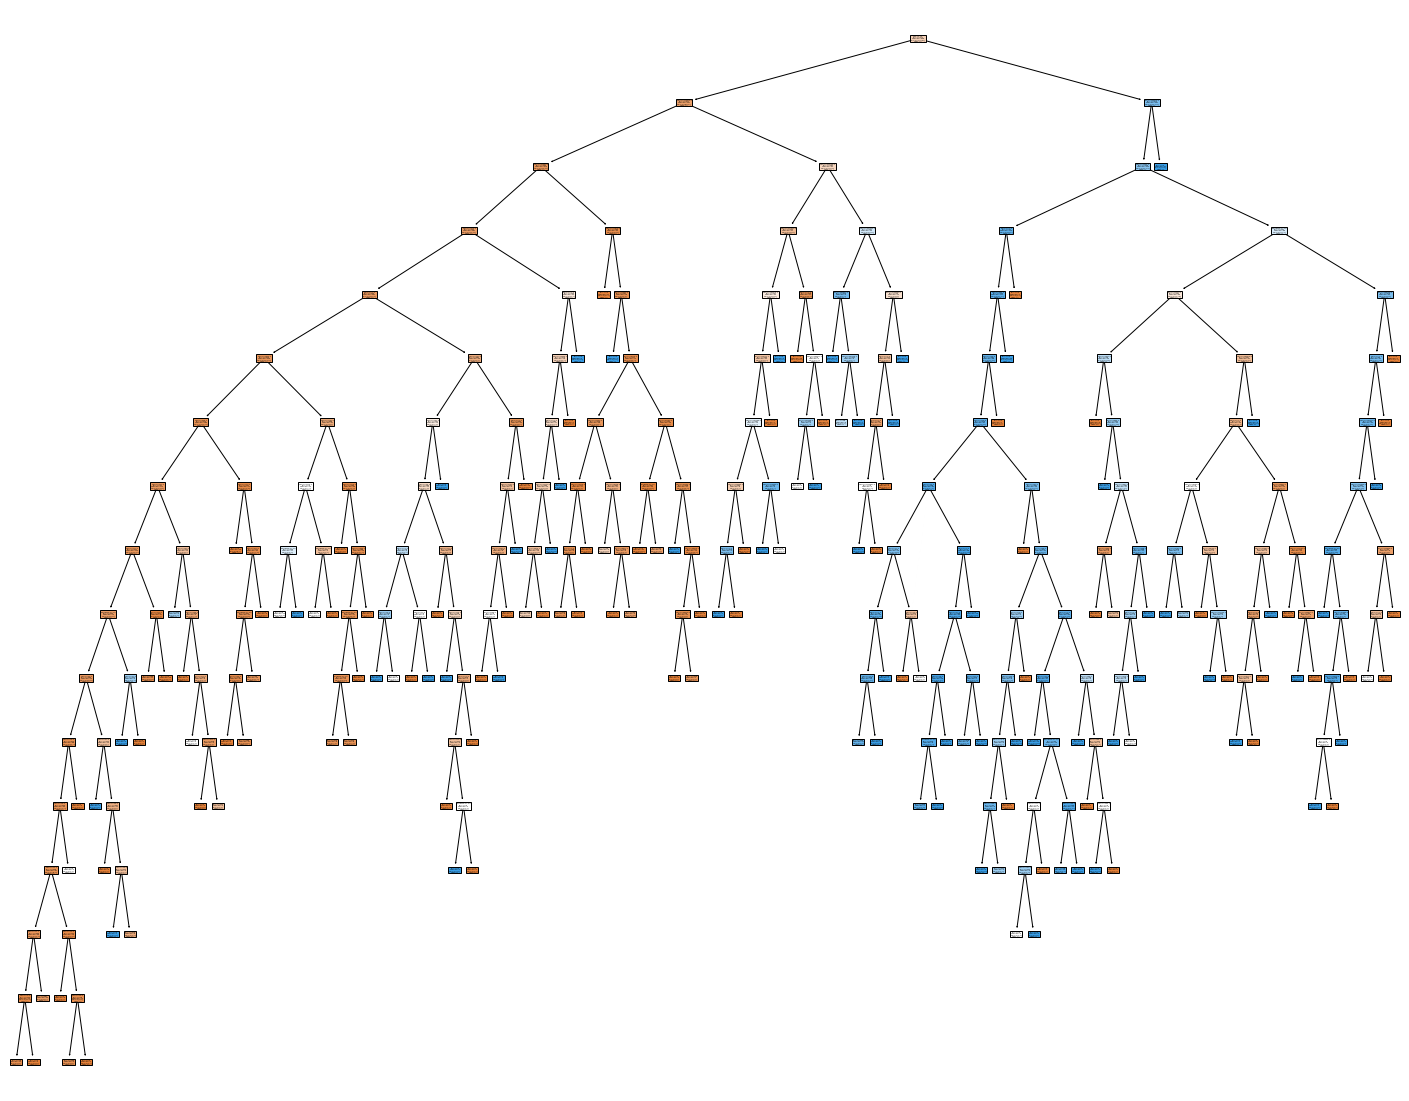

In [20]:
#menapilkan struktur Decision Tree

from sklearn import tree

feature_names = x.columns[:4]
target_names = y.unique().tolist()

target_names = [str(x) for x in target_names]

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt, feature_names = feature_names, class_names = target_names, filled = True)

In [21]:
#modeling dengan Random Forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 10, random_state = 42)
rf.fit(train_x, train_y)

#mengevaluasi hasil prediksi
y_prediksi4 = rf.predict(test_x)
akurasi_rf = rf.score(test_x, test_y)
akurasi_rf

0.8251121076233184

In [31]:
titanic_test = pd.read_csv('titanic_test.csv', sep=';')
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,78.292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,96.875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,86.625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,122.875,NaN,S


In [32]:
titanic_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    object 
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 36.0+ KB


In [33]:
#Kolom Embarked
#mengisi data null pada kolom Embarked dengan nilai yang paling banyak muncul (modus)

modus = titanic_test['Embarked'].mode()[0]
titanic_test['Embarked'] = titanic_test['Embarked'].fillna(modus)

#memeriksa apakah masih ada yang null pada kolom embarked
titanic_test['Embarked'].isna().sum()

0

In [34]:
#Menghapus kolom Cabin

titanic_test.drop('Cabin', axis=1, inplace=True)
#axis = 1 menandakan kolom, axis = 0 menandakan baris

In [35]:
#membuang kolom Ticket
titanic_test.drop('Ticket', axis=1, inplace=True)

In [36]:
#menghapus kolom yang tidak digunakan
titanic_test.drop('Name', axis=1, inplace=True)

In [37]:
#mengkonver data kolom Sex, male = 0; female = 1
titanic_test['Sex'] = titanic_test['Sex'].replace(['male', 'female'], [0, 1])
titanic_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,34.5,0,0,78.292,Q
1,893,3,1,47.0,1,0,7,S
2,894,2,0,62.0,0,0,96.875,Q
3,895,3,0,27.0,0,0,86.625,S
4,896,3,1,22.0,1,1,122.875,S


In [38]:
#mengkonver data kolom Embarked, S = 1, C = 2, Q = 3

titanic_test['Embarked'] = titanic_test['Embarked'].replace(['S', 'C', 'Q'], [1, 2, 3])

In [39]:
titanic_test['Fare'] = titanic_test['Fare'].str.replace(".","")

C:\Users\ferro\AppData\Local\Temp/ipykernel_10224/2661080.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  titanic_test['Fare'] = titanic_test['Fare'].str.replace(".","")


In [40]:
#mengisi data null dengan nilai 0

titanic_test['Fare'] = titanic_test['Fare'].fillna(0)
titanic_test['Age'] = titanic_test['Age'].fillna(0)
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    object 
 7   Embarked     418 non-null    int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 26.2+ KB


In [41]:
#menentukan variabel X 

x1 = titanic_test[['Sex', 'Parch', 'Fare', 'Embarked']]

In [42]:
#implementasi Random Forest pada dataset untuk melakukan prediksi

titanic_prediction = rf.predict(x1)
titanic_prediction

array([0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [43]:
#buat ke dataframe
df_titanic_prediction = pd.DataFrame({"Predicted Survived" : titanic_prediction})
df_titanic_prediction

,Predicted Survived
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [44]:
#menggabungkan hasil prediksi dengan dataset

result = pd.concat([titanic_test, df_titanic_prediction], ignore_index = False, axis = 1)
result

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Predicted Survived
0,892,3,0,34.5,0,0,78292,3,0
1,893,3,1,47.0,1,0,7,1,1
2,894,2,0,62.0,0,0,96875,3,0
3,895,3,0,27.0,0,0,86625,1,0
4,896,3,1,22.0,1,1,122875,1,1
...,...,...,...,...,...,...,...,...,...
413,1305,3,0,0.0,0,0,805,1,0
414,1306,1,1,39.0,0,0,1089,2,1
415,1307,3,0,38.5,0,0,725,1,0
416,1308,3,0,0.0,0,0,805,1,0


In [45]:
#menyimpan hasil yang baru ke dalam file csv
export_result2 = result.to_csv('Hasil Prediksi Titanic CSV.csv')
print(export_result2)

None
